# DS36 - Final Task (solution)

In [3]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

This is the soulution for the final task of the course Junior Data Scientist's First Month.

### Data
The data belong to a fictional travelling blog owned by Dylan. It represents the traffic of the blog for the last 3 months as a log file. There are 4 types of rows, representing 4 types of actions.
Snippets for each type of action:   

**1. newcommers / people first time visiting the site**  

2018-01-01 00:23:16;read;country_2;2458151289;Reddit;Asia  
*Explanation: timestamp of the visit, activity, which country is the visitor from (there are 8 countries, from country1 to country8), unique ID, where he found the blog (Reddit / SEO/ Adwords), which region is he/she interested in*

**2. recurring readers, but they are not subscribed**

2018-01-01 07:18:28;read;country_4;2458151771;Europe   
*Explanation: timestamp of the visit, activity, unique ID, which region is he/she interested in*

**3. subscribed readers**  
2018-01-01 08:02:08;subscribe;2458151851  
*Explanation: timestamp, activity, unique ID* 

**4. people who bought either an e-book for 8USD or an online course for 80USD**  
2018-01-03 01:33:30;buy;2458151481;80  
*Explanation: timestamp, activity, unique ID, price (it can be either 8 or 80)*  

We can assume that the same unique ID is used for the same person (he/she acquires the ID at the first visit on the blog and he/she has the same ID at subscribing and purchasing from the blog) and that the person who had bought something has also went through the prevoius 3 steps.

Dylan's budget for advertising is known aswell, he currently spends 250USD on Reddit, 500USD on AdWords and 250USD on SEO per month

### Task
The task was to answer 3 questions based on the provided data:  

**1. In which country should he prioritise his effort and why?**  
**2. Any other advice to Dilan on how to be smart with his investments based on the data from the last 3 months?**  
**3. Can you see any more interesting information (beyond the above 2 questions) in the data from which Dilan could profit?**

The original .csv file was parsed into 4 new seperate files using bash with the following commands:

grep "read" dilans_data.csv | grep -E "(Reddit|SEO|AdWords)" > new_readers.csv  
grep "read" dilans_data.csv | grep -v -E "(Reddit|SEO|AdWords)" > recurring.csv  
grep "subscribe" dilans_data.csv > subscribe_data.csv  
grep "buy" dilans_data.csv > buy_data.csv

4 DataFrames will be created for the analysis, for the 4 types of actions:    
**new** - newcommers
**rec** - recurring readers  
**sub** - subscribers   
**buy** - customers / people who have bought something    

## Exploratory data analysis

In [4]:
#creating dataframe for the new visitors
new = pd.read_csv("new_readers.csv", sep=';')
new.drop('read',1,inplace=True)
new.columns = ["Time","Country","ID","Source","Region"]

Text(0, 0.5, 'values')

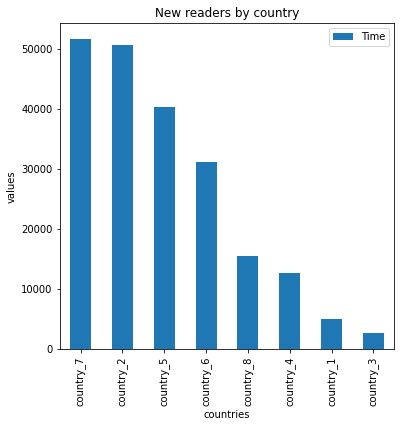

In [5]:
#plotting the number of new visitors by country as a bar chart
by_country = new.groupby("Country").count().sort_values(["Time"], ascending=False)
by_country.to_csv('new_users_by_country.csv')
by_country.plot(y='Time',kind='bar', figsize=[6,6])
plt.title('New readers by country')
plt.xlabel('countries')
plt.ylabel('values')

The most new visitors are from country_7 and country_2

In [6]:
#checking which topis are new readers the most interested in
new.groupby("Region").count().sort_values(["Time"], ascending=False)

,Time,Country,ID,Source
Region,,,,
Asia,76092,76092,76092,76092
Europe,39561,39561,39561,39561
North America,37566,37566,37566,37566
South America,25095,25095,25095,25095
Africa,15913,15913,15913,15913
Australia,15795,15795,15795,15795


The most newcommers are interested in Asia, Europe and North America 

In [7]:
#creating a DataFrame for the recurring readers
rec = pd.read_csv("recurring.csv", sep=';')
rec.drop('read',1,inplace=True)
rec.columns = ["Time","Country","ID","Region"]

Text(0, 0.5, 'values')

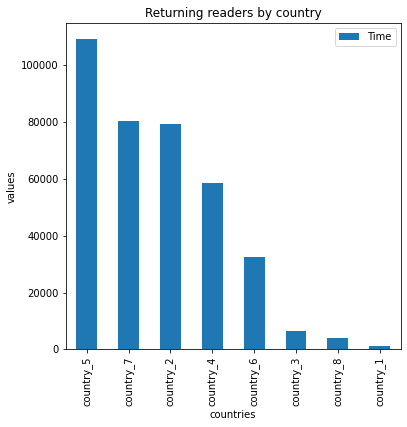

In [8]:
#plotting the number of new visitors by country as a bar chart
by_country = rec.groupby("Country").count().sort_values(["Time"], ascending=False)
by_country.to_csv("recurring_by_country.csv")
by_country.plot(y='Time',kind='bar', figsize=[6,6])
plt.title('Returning readers by country')
plt.xlabel('countries')
plt.ylabel('values')

The most recurring visitors are from country_5 and cuntry_3. In the top three there is country_2 aswell. These countries had the most newcommers too, so let's check them in more detail

In [9]:
#checking which topis are recurring readers the most interested in
rec.groupby("Region").count().sort_values(["Time"], ascending=False)

,Time,Country,ID
Region,,,
Asia,118833,118833,118833
North America,92766,92766,92766
Europe,54136,54136,54136
South America,51706,51706,51706
Africa,27481,27481,27481
Australia,26931,26931,26931


The top 3 topics are the same as among newcommers, but the order of them is different. (North America is the second, but it was the third in order at newcommers)

In [10]:
#Creating a DataFrame for the subscribed users
sub = pd.read_csv("subscribe_data.csv", sep=';')
sub.drop('subscribe',1,inplace=True)
sub.columns = ["Time","ID"]

In [11]:
#Creating a DataFrame for the customers
buy = pd.read_csv("buy_data.csv", sep=';')
buy.drop('buy',1,inplace=True)
buy.columns = ["Time","ID","Price"]

In [12]:
#Classifying the purchases
buy.groupby("Price").count()

,Time,ID
Price,,
8,6639,6639
80,1767,1767


3x more E-books were sold than online courses. The revenue from the E-books is 53112USD, the revenue from the online courses is 141360USD. Total revenue: 194472USD.

## 1. In which country should he prioritise his effort and why?

In [13]:
#counting the recurring readers by country
pd.merge(rec, new, how="left", on="ID").groupby("Country_x").count().sort_values(["Time_x"], ascending=False)

,Time_x,ID,Region_x,Time_y,Country_y,Source,Region_y
Country_x,,,,,,,
country_5,109382,109382,109382,109382,109382,109382,109382
country_7,80276,80276,80276,80276,80276,80276,80276
country_2,79401,79401,79401,79401,79401,79401,79401
country_4,58507,58507,58507,58507,58507,58507,58507
country_6,32596,32596,32596,32596,32596,32596,32596
country_3,6386,6386,6386,6386,6386,6386,6386
country_8,4150,4150,4150,4150,4150,4150,4150
country_1,1155,1155,1155,1155,1155,1155,1155


Text(0, 0.5, 'values')

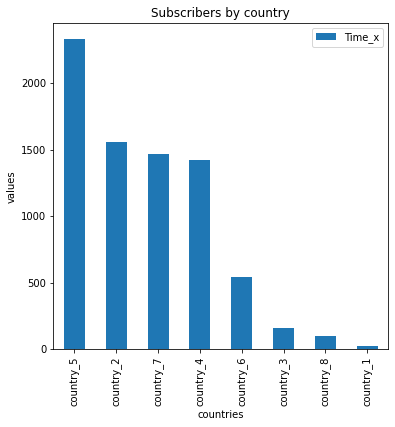

In [14]:
#Plotting the number of subscribers by country as a bar chart
subscribers = pd.merge(sub, new, how="left", on="ID").groupby("Country").count().sort_values(["Time_x"], ascending=False)
subscribers.to_csv("subscribers_by_country.csv")
subscribers.plot(y='Time_x',kind='bar', figsize=[6,6])
plt.title('Subscribers by country')
plt.xlabel('countries')
plt.ylabel('values')

Text(0, 0.5, 'values')

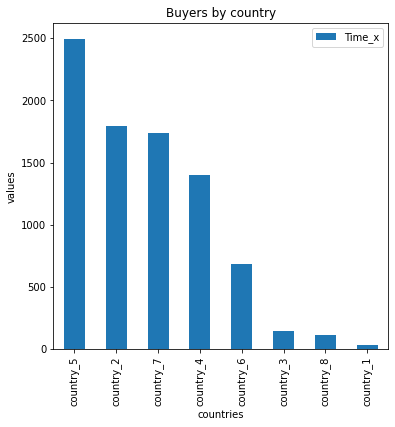

In [15]:
#Plotting the number of customers by country as a bar chart
buyers = pd.merge(buy,new,how="left",on="ID").groupby("Country").count().sort_values(["Time_x"], ascending=False)
buyers.to_csv("buyers_by_country.csv")
buyers.plot(y='Time_x',kind='bar', figsize=[6,6])
plt.title('Buyers by country')
plt.xlabel('countries')
plt.ylabel('values')

Text(0, 0.5, 'total purchases')

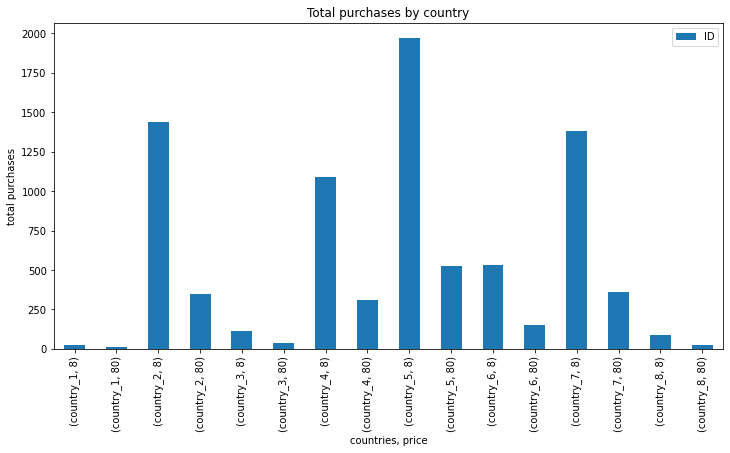

In [16]:
#cchecking the revenue from E-books and online courses for each country 
segments = pd.merge(buy,new,how="left",on="ID").groupby(["Country","Price"]).count()
segments.plot(y="ID",kind='bar',figsize=[12,6])
plt.title('Total purchases by country')
plt.xlabel('countries, price')
plt.ylabel('total purchases')

### I think Dylan should focus on country_5, because the most new visitors, the most recurring readers and the most customers are from this country.

## 2. Any other advice to Dilan on how to be smart with his investments based on the data from the last 3 months?

Text(0, 0.5, 'values')

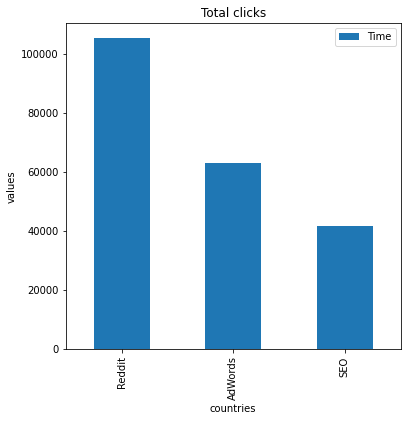

In [17]:
#counting the total number of clicks by source
clicks = new.groupby("Source").count().sort_values(["Time"], ascending=False)
clicks.to_csv("total_clicks_by_source.csv")
clicks.plot(y='Time',kind='bar', figsize=[6,6])
plt.title('Total clicks')
plt.xlabel('countries')
plt.ylabel('values')

Text(0.5, 1.0, 'Budget')

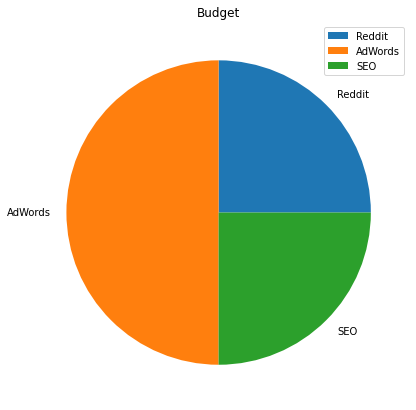

In [18]:
#visualising Dylan's current spending on a pie chart
budgets = [250,500,250]
budget_series = pd.DataFrame({'Source': ['Reddit', 'AdWords', 'SEO'], 'Values': budgets})
budget_series.plot(y='Values',labels=budget_series["Source"],kind='pie',figsize=[7,7])
plt.legend(loc="best")
plt.ylabel("")
plt.title("Budget")

Text(0, 0.5, 'price')

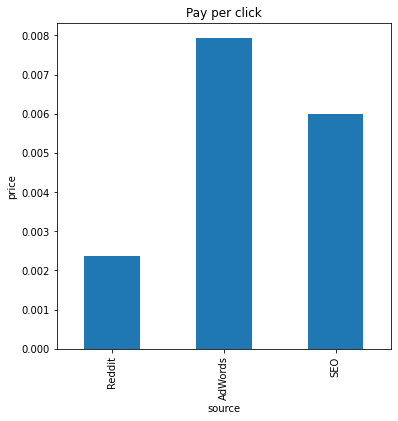

In [19]:
#calculating the pay-per-click ratio for each source
ppc = budgets / new.groupby("Source").count().sort_values(["Time"], ascending=False)["Time"]
ppc.plot(kind='bar',figsize=[6,6])
plt.title('Pay per click')
plt.xlabel('source')
plt.ylabel('price')

In [20]:
#counting the sources for each country
new.groupby(["Country","Source"]).count()

Time     ID  Region
Country   Source                       
country_1 AdWords   1555   1555    1555
          Reddit    2497   2497    2497
          SEO       1024   1024    1024
country_2 AdWords  15073  15073   15073
          Reddit   25519  25519   25519
          SEO      10083  10083   10083
country_3 AdWords    813    813     813
          Reddit    1364   1364    1364
          SEO        565    565     565
country_4 AdWords   3812   3812    3812
          Reddit    6438   6438    6438
          SEO       2501   2501    2501
country_5 AdWords  12128  12128   12128
          Reddit   20120  20120   20120
          SEO       8101   8101    8101
country_6 AdWords   9303   9303    9303
          Reddit   15643  15643   15643
          SEO       6210   6210    6210
country_7 AdWords  15753  15753   15753
          Reddit   25900  25900   25900
          SEO      10137  10137   10137
country_8 AdWords   4628   4628    4628
          Reddit    7735   7735    7735
          SEO       3120   3120    3120

The most visitors come to the blog from Reddit, but this source has a budget of 250USD. Less people com from the AdWords source, but this source has a bigger budget. I think Dylan should rethink how much he spends on each source. The pay-per-click ratio is 3 times bigger at Adwords than at Reddit. Reddit also has the most clicks in each country.

## 3. Can you see any more interesting information (beyond the above 2 questions) in the data from which Dilan could profit?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Total')

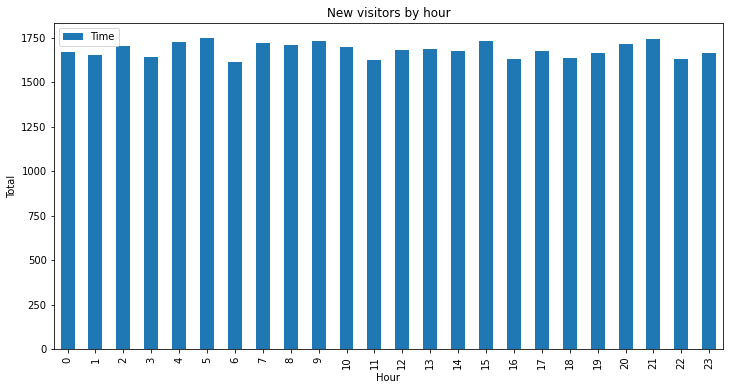

In [21]:
#plotting the total number of newcommers in country 5 by hour
country_5 = new[(new["Country"] == 'country_5')]
country_5["Hour"] = pd.to_numeric(country_5["Time"].str.split(" ").str[1].str.split(":").str[0])
hours = country_5.groupby("Hour").count()
hours.plot(y="Time", kind='bar', figsize=[12,6])
plt.title('New visitors by hour')
plt.xlabel('Hour')
plt.ylabel('Total')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Total')

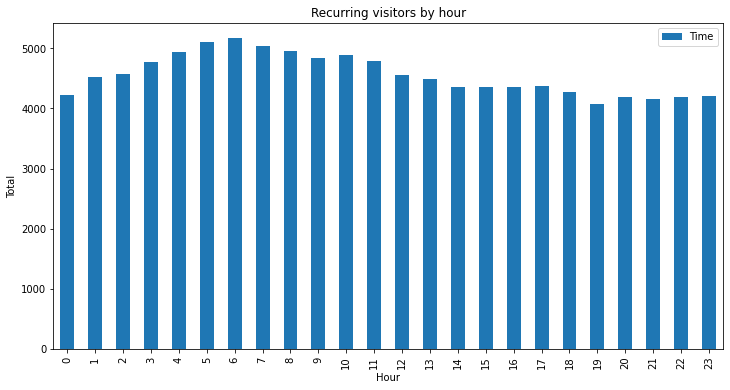

In [22]:
#plotting the total number of newcommers in country 5 by hour
country_5 = rec[(rec["Country"] == 'country_5')]
country_5["Hour"] = pd.to_numeric(country_5["Time"].str.split(" ").str[1].str.split(":").str[0])
hours = country_5.groupby("Hour").count()
hours.plot(y="Time", kind='bar',figsize=[12,6])
hours.to_csv("recurring_by_hour.csv")
plt.title('Recurring visitors by hour')
plt.xlabel('Hour')
plt.ylabel('Total')

A felső 2 grafikonon az oldal látogatottsága látható, órárkra lebontva. Az először az oldalra látogató embereknél nincs nagy eltérés, de az olvasók közt a reggeli és délelőtti órákban érdemesebb reklámozni (reggel 3 és 11 között), ugyanis ekkor érkezik a legtöbb látogató.
The 2 charts above represent the total number of visitors on the blog by hour. There is no big difference between particular hours, but at recurring readers the most frequent hours are between 3 and 11 in the morning. I think Dylan should advertise more frequently in this timeframe (3 to 11). 

Text(0, 0.5, 'Total')

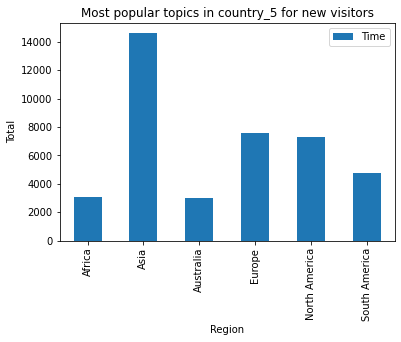

In [23]:
#plotting the most popular topics for newcommers in country_5
country_5 = new[(new["Country"] == 'country_5')]
regions = country_5.groupby("Region").count()
regions.plot(y="Time", kind='bar')
regions.to_csv("top_regions_in_country5.csv")
plt.title('Most popular topics in country_5 for new visitors')
plt.xlabel('Region')
plt.ylabel('Total')

Text(0, 0.5, 'Total')

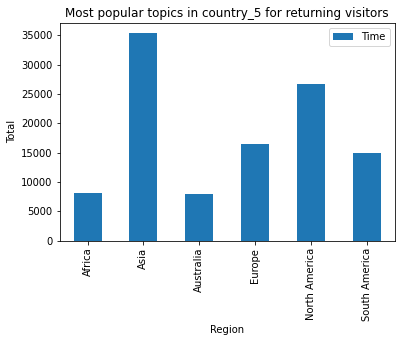

In [24]:
#plotting the most popular topics for recurring readers in country_5
country_5 = rec[(rec["Country"] == 'country_5')]
regions = country_5.groupby("Region").count()
regions.plot(y="Time", kind='bar')
regions.to_csv("top_regions_in_country5.csv")
plt.title('Most popular topics in country_5 for returning visitors')
plt.xlabel('Region')
plt.ylabel('Total')

The most popular topics in country_5 are Asia, North America and Europe. Dylan should create content regarding these topics and he should include them in his advertisements, too.

In [25]:
#counting newcommers by day in country_5
country_5 = new[(new["Country"] == 'country_5')]
country_5['Day'] = pd.to_datetime(country_5['Time'], format="%Y-%m-%d %H:%M:%S").dt.day_name()
days = country_5.groupby("Day").count().sort_values("Time", ascending=False)
days

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Time,Country,ID,Source,Region
Day,,,,,
Tuesday,6287,6287,6287,6287,6287
Friday,6110,6110,6110,6110,6110
Monday,5899,5899,5899,5899,5899
Wednesday,5810,5810,5810,5810,5810
Thursday,5509,5509,5509,5509,5509
Sunday,5380,5380,5380,5380,5380
Saturday,5354,5354,5354,5354,5354


The most newcommers visit the blog on Tuesday, Friday and Monday

In [26]:
#counting recurring visitors by day in country_5
country_5 = rec[(rec["Country"] == 'country_5')]
country_5['Day'] = pd.to_datetime(country_5['Time'], format="%Y-%m-%d %H:%M:%S").dt.day_name()
days = country_5.groupby("Day").count().sort_values("Time", ascending=False)
days

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Time,Country,ID,Region
Day,,,,
Thursday,17363,17363,17363,17363
Friday,16561,16561,16561,16561
Tuesday,15696,15696,15696,15696
Saturday,15648,15648,15648,15648
Wednesday,15212,15212,15212,15212
Sunday,15037,15037,15037,15037
Monday,13865,13865,13865,13865


The most recurring readers visit the blog on Thursday, Friday and Tuesday 

Text(0, 0.5, 'Total')

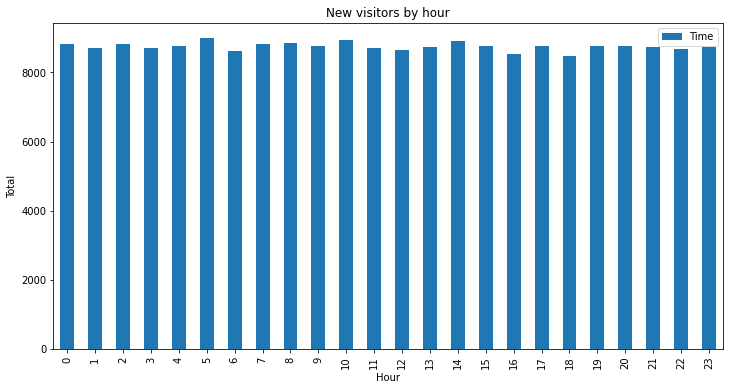

In [27]:
#plotting the total number of newcommers by hour
all_countries = new.copy()
all_countries["Hour"] = pd.to_numeric(all_countries["Time"].str.split(" ").str[1].str.split(":").str[0])
hours = all_countries.groupby("Hour").count()
hours.plot(y="Time", kind='bar',figsize=[12,6])
plt.title('New visitors by hour')
plt.xlabel('Hour')
plt.ylabel('Total')

Text(0, 0.5, 'Total')

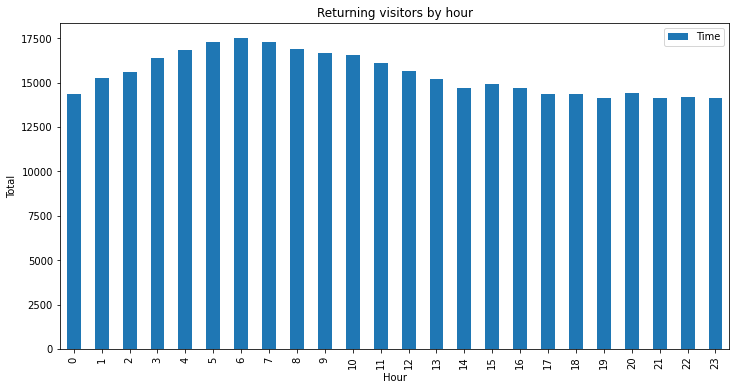

In [28]:
#plotting the total number of recurring visitors by hour
all_countries = rec.copy()
all_countries["Hour"] = pd.to_numeric(all_countries["Time"].str.split(" ").str[1].str.split(":").str[0])
hours = all_countries.groupby("Hour").count()
hours.plot(y="Time", kind='bar',figsize=[12,6])
plt.title('Returning visitors by hour')
plt.xlabel('Hour')
plt.ylabel('Total')

A reggeli órákban (3 és 11 között) olvassák a legtöbben a weboldalt. Az először látogatóknál egyenletesen oszlik el nap közben.
The most people read the blog in the morning, between 3 and 11'o clock. There is no siginficant difference between particular hours at newcommers.

Text(0, 0.5, 'Total')

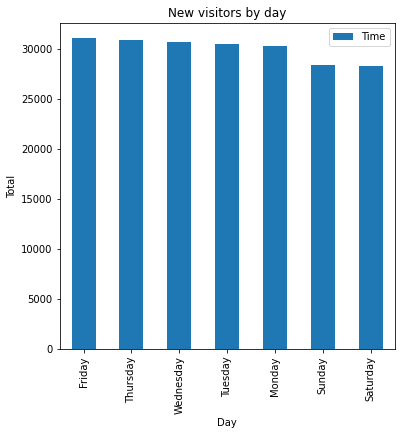

In [29]:
#plotting the total number of newcommers by day
all_countries = new.copy()
all_countries['Day'] = pd.to_datetime(all_countries['Time'], format="%Y-%m-%d %H:%M:%S").dt.day_name()
days = all_countries.groupby("Day").count().sort_values("Time", ascending=False)
days.plot(y='Time',kind='bar',figsize=[6,6])
plt.title('New visitors by day')
plt.xlabel('Day')
plt.ylabel('Total')

Text(0, 0.5, 'Total')

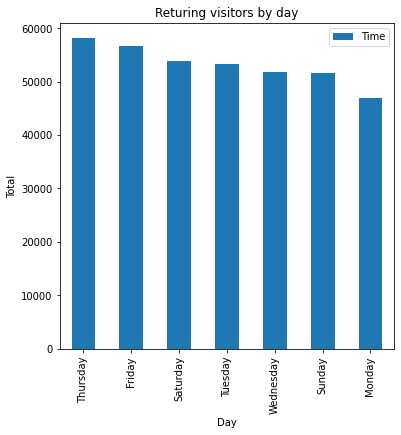

In [30]:
#plotting the total number of recurring visitors by day
all_countries = rec.copy()
all_countries['Day'] = pd.to_datetime(all_countries['Time'], format="%Y-%m-%d %H:%M:%S").dt.day_name()
days = all_countries.groupby("Day").count().sort_values("Time", ascending=False)
days.plot(y='Time',kind='bar',figsize=[6,6])
plt.title('Returing visitors by day')
plt.xlabel('Day')
plt.ylabel('Total')

The most recurring readers visit the blog on Thursday, Friday and Saturday.